In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = r"D:\Briam\Clases\GEM PERU\1. Bussiness Analytics con Python\2. Inputs".replace("\\","/")
name = "MarketingDirecto_limpio.csv"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ",", header = 0)
df.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [ ]:
df_pre = df.copy()

### Datos Categóricos

Analizamos nuestras variables de tipo categórico

In [ ]:
df_pre_cat = df_pre.select_dtypes("object")
df_pre_cat.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Historial
0,Adulta,Femenino,Propia,Soltero,Lejos,Alto
1,Media,Masculino,Alquilada,Soltero,Cerca,Alto
2,Joven,Femenino,Alquilada,Soltero,Cerca,Bajo
3,Media,Masculino,Propia,Casado,Cerca,Alto
4,Media,Femenino,Propia,Soltero,Cerca,Alto


*Consideración: Para utilizar cualquier modelo es necesario convertir nuestros datos categóricos a numéricos*

**Variables categóricas ordinales:** Sus valores se pueden clasificar en categorías y se pueden ordenar en jerarquías

In [ ]:
df_pre_cat["Edad"].unique()

array(['Adulta', 'Media', 'Joven'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories = [["Joven","Media","Adulta"]])

In [ ]:
df_pre_cat["Edad_Ordinal"] = oe.fit_transform(df_pre_cat[["Edad"]])
df_pre_cat.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Historial,Edad_Ordinal
0,Adulta,Femenino,Propia,Soltero,Lejos,Alto,2.0
1,Media,Masculino,Alquilada,Soltero,Cerca,Alto,1.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,Bajo,0.0
3,Media,Masculino,Propia,Casado,Cerca,Alto,1.0
4,Media,Femenino,Propia,Soltero,Cerca,Alto,1.0


*Consideración: Cuando utilizas el encoding, los labels son guardados para ser usados en el momento que lo necesites.*

In [ ]:
oe.categories_

[array(['Joven', 'Media', 'Adulta'], dtype=object)]

In [ ]:
# Borramos la variable Edad
df_pre_cat = df_pre_cat.drop(columns = ["Edad"])
df_pre_cat.head()

,Genero,Vivienda,Ecivil,Ubicacion,Historial,Edad_Ordinal
0,Femenino,Propia,Soltero,Lejos,Alto,2.0
1,Masculino,Alquilada,Soltero,Cerca,Alto,1.0
2,Femenino,Alquilada,Soltero,Cerca,Bajo,0.0
3,Masculino,Propia,Casado,Cerca,Alto,1.0
4,Femenino,Propia,Soltero,Cerca,Alto,1.0


In [ ]:
# Reconstruimos la variable Edad inicial
df_pre_cat["Edad"] = pd.DataFrame(oe.inverse_transform(df_pre_cat[["Edad_Ordinal"]]))
df_pre_cat.head()

,Genero,Vivienda,Ecivil,Ubicacion,Historial,Edad_Ordinal,Edad
0,Femenino,Propia,Soltero,Lejos,Alto,2.0,Adulta
1,Masculino,Alquilada,Soltero,Cerca,Alto,1.0,Media
2,Femenino,Alquilada,Soltero,Cerca,Bajo,0.0,Joven
3,Masculino,Propia,Casado,Cerca,Alto,1.0,Media
4,Femenino,Propia,Soltero,Cerca,Alto,1.0,Media


In [ ]:
# Eliminamos nuevamente la variable Edad para automatizar lo demás
df_pre_cat = df_pre_cat.drop(columns = ["Edad"])
df_pre_cat.head()

,Genero,Vivienda,Ecivil,Ubicacion,Historial,Edad_Ordinal
0,Femenino,Propia,Soltero,Lejos,Alto,2.0
1,Masculino,Alquilada,Soltero,Cerca,Alto,1.0
2,Femenino,Alquilada,Soltero,Cerca,Bajo,0.0
3,Masculino,Propia,Casado,Cerca,Alto,1.0
4,Femenino,Propia,Soltero,Cerca,Alto,1.0


**Variables categóricas nominales:** Sus valores se pueden clasificar en categorías y no tiene un orden específico.

In [ ]:
pd.get_dummies(df_pre_cat)

,Edad_Ordinal,Genero_Femenino,Genero_Masculino,Vivienda_Alquilada,Vivienda_Propia,Ecivil_Casado,Ecivil_Soltero,Ubicacion_Cerca,Ubicacion_Lejos,Historial_Alto,Historial_Bajo,Historial_Medio
0,2.0,True,False,False,True,False,True,False,True,True,False,False
1,1.0,False,True,True,False,False,True,True,False,True,False,False
2,0.0,True,False,True,False,False,True,True,False,False,True,False
3,1.0,False,True,False,True,True,False,True,False,True,False,False
4,1.0,True,False,False,True,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,False,True,True,False,False,True,False,True,False,False,False
996,2.0,False,True,False,True,False,True,True,False,False,False,True
997,1.0,False,True,False,True,True,False,True,False,False,False,True
998,0.0,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
pd.get_dummies(df_pre_cat, drop_first = True)

,Edad_Ordinal,Genero_Masculino,Vivienda_Propia,Ecivil_Soltero,Ubicacion_Lejos,Historial_Bajo,Historial_Medio
0,2.0,False,True,True,True,False,False
1,1.0,True,False,True,False,False,False
2,0.0,False,False,True,False,True,False
3,1.0,True,True,False,False,False,False
4,1.0,False,True,True,False,False,False
...,...,...,...,...,...,...,...
995,1.0,True,False,True,True,False,False
996,2.0,True,True,True,False,False,True
997,1.0,True,True,False,False,False,True
998,0.0,True,False,False,False,False,True


## Datos Numéricos

Analizamos nuestras variables de tipo numéricos

In [ ]:
df_pre_num = df_pre.select_dtypes("number")
df_pre_num.head()

,Salario,Hijos,Catalogos,Monto
0,47500,0,6,755
1,63600,0,6,1318
2,13500,0,18,296
3,85600,1,18,2436
4,68400,0,12,1304


*Consideración: Las variables numéricas deben estar en la misma escala antes de ser utilizados en cualquier modelo.*

**MinMax Scaler:** Escalamiento en función de los valores máximos y mínimos

\begin{equation}
X_{scaled} = \frac{X-X_{min}}{X_{max}-X_{min}}
\end{equation}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
mms.fit(df_pre_num)

MinMaxScaler()

**Normalizer Scaler:** Escalamiento en función a la norma L2 de un vector

\begin{equation}
X_{normalized} = \frac{X}{\sqrt{X_{1}^2+X_{2}^2+X_{3}^2+...+X_{n}^2}}
\end{equation}

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
ns = Normalizer()

In [ ]:
ns.fit(df_pre_num)

Normalizer()

**Standard Scaler:** Escalamiento en función a la distribución normal estándar. Usa a la media como estadístico de centralidad

\begin{equation}
X_{standard} = \frac{X-\bar{X}}{S}
\end{equation}

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(df_pre_num)

StandardScaler()

**Robust Scaler:** Escalamiento en función a la distribución normal estándar. Usa el rango intercuartílico.

\begin{equation}
X_{robust} = \frac{X-(Q_{3}-Q{1})}{S}
\end{equation}

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rs = RobustScaler()

In [ ]:
rs.fit(df_pre_num)

RobustScaler()

*Ejemplo: Veremos gráficamente las distribuciones de la variable Salario*

In [ ]:
pd.DataFrame(ns.fit_transform(df_pre_num.T).T, columns = df_pre_num.columns)

,Salario,Hijos,Catalogos,Monto,MinMax_Scaler
0,0.023504,0.000000,0.011781,0.015401,0.021405
1,0.031471,0.000000,0.011781,0.026885,0.030620
2,0.006680,0.000000,0.035343,0.006038,0.001946
3,0.042357,0.022496,0.035343,0.049691,0.043211
4,0.033846,0.000000,0.023562,0.026600,0.033367
...,...,...,...,...,...
995,0.020040,0.022496,0.035343,0.021888,0.017399
996,0.022168,0.000000,0.047124,0.028905,0.019860
997,0.039091,0.044992,0.035343,0.013687,0.039434
998,0.026523,0.022496,0.047124,0.019848,0.024897


In [ ]:
df_pre_num["MinMax_Scaler"] = mms.fit_transform(df_pre_num[["Salario"]])
df_pre_num["Normalizer_Scaler"] = pd.DataFrame(ns.fit_transform(df_pre_num.T).T, columns = df_pre_num.columns)["Salario"]
df_pre_num["Standard_Scaler"] = ss.fit_transform(df_pre_num[["Salario"]])
df_pre_num["Robust_Scaler"] = rs.fit_transform(df_pre_num[["Salario"]])

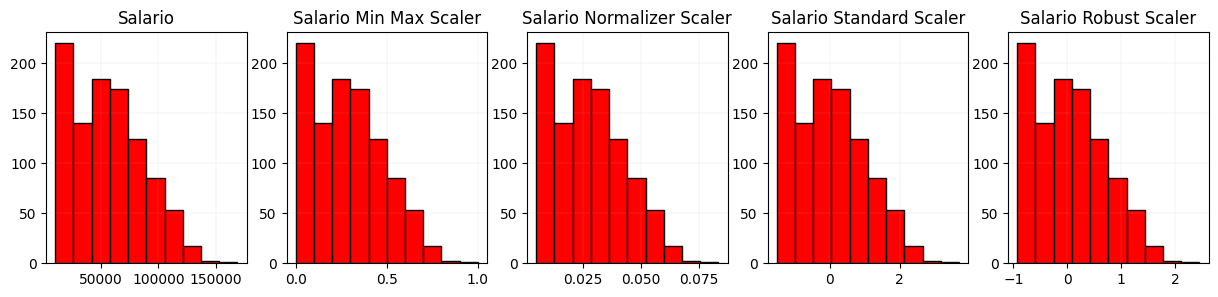

In [ ]:
# Creamos la maqueta donde van a ir las gráficas
fig = plt.figure(figsize = (15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# Colocamos los datos
ax1.set_title("Salario")
ax1.hist(df_pre_num["Salario"], bins = 10, color = "red", edgecolor = "black")
ax1.grid(linewidth=0.1)

ax2.set_title("Salario Min Max Scaler")
ax2.hist(df_pre_num["MinMax_Scaler"], bins = 10, color = "red", edgecolor = "black")
ax2.grid(linewidth=0.1)

ax3.set_title("Salario Normalizer Scaler")
ax3.hist(df_pre_num["Normalizer_Scaler"], bins = 10, color = "red", edgecolor = "black")
ax3.grid(linewidth=0.1)

ax4.set_title("Salario Standard Scaler")
ax4.hist(df_pre_num["Standard_Scaler"], bins = 10, color = "red", edgecolor = "black")
ax4.grid(linewidth=0.1)

ax5.set_title("Salario Robust Scaler")
ax5.hist(df_pre_num["Robust_Scaler"], bins = 10, color = "red", edgecolor = "black")
ax5.grid(linewidth=0.1)
plt.show()